# Mental Fitness Tracker ( Chinmay Jadhav )

In [11]:
#importing libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [12]:
#Extracting data:

data_1 = pd.read_csv("Mental fitness dataset.csv")

In [13]:
data_1.shape

(108553, 11)

In [14]:
data_1.head()

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Unnamed: 10
0,0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260


In [15]:
data_1.rename(columns={'Unnamed: 10':'Mental_fitness'}, inplace=True)

In [16]:
#Data cleaning


data_1.drop('Code', axis=1,inplace=True)
data_1.drop('index', axis=1,inplace=True)

In [17]:
#data = pd.merge(data_1,data_2)

In [18]:
data_1.dropna(inplace=True)

In [19]:
data_1.isnull().sum()

Entity                    0
Year                      0
Schizophrenia (%)         0
Bipolar disorder (%)      0
Eating disorders (%)      0
Anxiety disorders (%)     0
Drug use disorders (%)    0
Depression (%)            0
Mental_fitness            0
dtype: int64

In [20]:
# data_1["Entity"].fillna(0, inplace=True)
# data_1["Year"].fillna(0, inplace=True)
# data_1["Schizophrenia (%)"].fillna(0, inplace=True)
# data_1["Bipolar disorder (%)"].fillna(0, inplace=True)
# data_1["Eating disorders (%)"].fillna(0, inplace=True)
# data_1["Anxiety disorders (%)"].fillna(0, inplace=True)
# data_1["Drug use disorders (%)"].fillna(0, inplace=True)
# data_1["Depression (%)"].fillna(0, inplace=True)
# data_1["Mental_fitness"].fillna(0, inplace=True)

In [21]:
data_1.columns

Index(['Entity', 'Year', 'Schizophrenia (%)', 'Bipolar disorder (%)',
       'Eating disorders (%)', 'Anxiety disorders (%)',
       'Drug use disorders (%)', 'Depression (%)', 'Mental_fitness'],
      dtype='object')

In [22]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6412 entries, 0 to 6467
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Entity                  6412 non-null   object 
 1   Year                    6412 non-null   object 
 2   Schizophrenia (%)       6412 non-null   object 
 3   Bipolar disorder (%)    6412 non-null   object 
 4   Eating disorders (%)    6412 non-null   object 
 5   Anxiety disorders (%)   6412 non-null   float64
 6   Drug use disorders (%)  6412 non-null   float64
 7   Depression (%)          6412 non-null   float64
 8   Mental_fitness          6412 non-null   float64
dtypes: float64(4), object(5)
memory usage: 500.9+ KB


In [23]:
data_1.size,data_1.shape

(57708, (6412, 9))

In [24]:
data_1.head()

,Entity,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Mental_fitness
0,Afghanistan,1990,0.16056,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,Afghanistan,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,Afghanistan,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,Afghanistan,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,Afghanistan,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

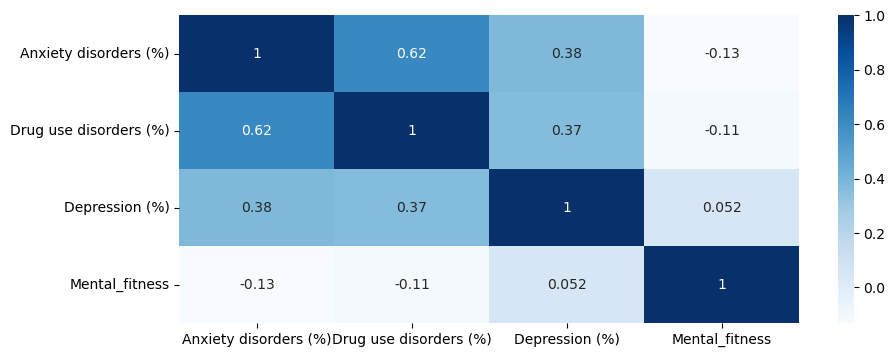

In [25]:
#Visualization:

plt.figure(figsize = (10,4))
sns.heatmap(data_1.corr(),annot=True,cmap='Blues')
plt.plot

In [26]:
# sns.pairplot(data_1,corner=True)
# plt.show()

In [27]:
mean = data_1['Mental_fitness'].mean()
mean

1.5785454449469745

In [28]:
# fig = px.pie(data_1, values='Mental_fitness', names='Year')
# fig.show()

In [29]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for i in data_1.columns:
    if data_1[i].dtype == 'object':
        data_1[i]=l.fit_transform(data_1[i]) 

In [30]:
#Spliting the dataset

X = data_1.drop('Mental_fitness', axis=1)
y = data_1['Mental_fitness']

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [32]:
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("\ny_train",y_train.shape)
print("y_test",y_test.shape)

X_train (4488, 8)
X_test (1924, 8)

y_train (4488,)
y_test (1924,)


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)

y_train_pred = lreg.predict(X_train)
mse = mean_squared_error(y_train, y_train_pred)
rmse = (np.sqrt(mse))
r2 = r2_score(y_train, y_train_pred)

In [36]:
print("The Linear Regression model performance for training set")
print("---------------------------------------------------")
print("Mean Squared Error is ",format(mse))
print("Root Mean Squared Error is ",format(rmse))
print("R2 score is ",format(r2))

The Linear Regression model performance for training set
---------------------------------------------------
Mean Squared Error is  0.6109605738235598
Root Mean Squared Error is  0.7816396700677108
R2 score is  0.16220317734065048


In [40]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
mse = mean_squared_error(y_train, y_train_pred)
rmse = (np.sqrt(mse))
r2 = r2_score(y_train, y_train_pred)

print("The Random Forest Regressor model performance for training set")
print("---------------------------------------------------")
print("Mean Squared Error is ",format(mse))
print("Root Mean Squared Error is ",format(rmse))
print("R2 score is ",format(r2))

The Random Forest Regressor model performance for training set
---------------------------------------------------
Mean Squared Error is  0.0006786724290438116
Root Mean Squared Error is  0.02605134217355819
R2 score is  0.9990693513967341


In [41]:
#Evaluation

# Linear regression model evaluation for testing set

y_test_pred = lreg.predict(X_test) 
mse = mean_squared_error(y_test, y_test_pred)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_pred)))
r2 = r2_score(y_test, y_test_pred)

print("The Linear Regression model performance for testing set")
print("---------------------------------------------------")
print("Mean Squared Error is ",format(mse))
print("Root Mean Squared Error is ",format(rmse))
print("R2 score is ",format(r2))


The Linear Regression model performance for testing set
---------------------------------------------------
Mean Squared Error is  0.5903794181504785
Root Mean Squared Error is  0.768361515271606
R2 score is  0.17392874926724866


In [42]:
#Random Forest Regressor model evaluation for testing set

y_test_pred = rf.predict(X_test) 
mse = mean_squared_error(y_test, y_test_pred)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_pred)))
r2 = r2_score(y_test, y_test_pred)

print("The Random Forest Regressor model performance for testing set")
print("---------------------------------------------------")
print("Mean Squared Error is ",format(mse))
print("Root Mean Squared Error is ",format(rmse))
print("R2 score is ",format(r2))

The Random Forest Regressor model performance for testing set
---------------------------------------------------
Mean Squared Error is  0.003238158805565259
Root Mean Squared Error is  0.05690482234016076
R2 score is  0.9954691003575894
